# Organizing data with the Pandas *groupby* function

For this example we will assume and experiment comparing the effect of a drug on wildtype and mutant animal. There are two measurements for each animal prior to and after drug treatment. We will start with the data in [tidy format](https://en.wikipedia.org/wiki/Tidy_data)

In [1]:
import pandas as pd

df = pd.read_csv('groupby_data.csv')
print(df.head())

   animal genotype  condition  measurement  value
0       1       WT   baseline            1    0.9
1       1       WT   baseline            2    1.1
2       1       WT  treatment            1    1.8
3       1       WT  treatment            2    2.2
4       2       WT   baseline            1    0.8


We'd like to compare treatment to baseline in both the WT and mutant animals. The [Pandas](https://pandas.pydata.org/) *groupby* function will organize the data for us and the resulting data structure has a *get_group* function that will allow us to access the data for each of the four groups

In [2]:
grouped = df.groupby(['genotype', 'condition'])
wt_baseline = grouped.get_group(('WT', 'baseline'))
print(wt_baseline.head())

   animal genotype condition  measurement  value
0       1       WT  baseline            1    0.9
1       1       WT  baseline            2    1.1
4       2       WT  baseline            1    0.8
5       2       WT  baseline            2    1.2


The *groupby* data structure has [methods](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby-object-attributes) for basic data analysis. We'll use the *mean* and *std* methods which generate new dataframes, each with a [multiIndex](http://pandas.pydata.org/pandas-docs/stable/advanced.html). In these dataframes, the value column now represent the mean (std) of the corresponding category of animals. With the multiIndex, accessing sections of the data is relatively easy.

In [3]:
mean = grouped.mean()
std = grouped.std()
print(mean.head())
print()
print('The WT baseline average is', mean.loc[('WT','baseline')]['value'])
print()
print(mean.loc[('WT',)]['value'])  # THe loc method provides easy access to the top level of the multiIndex
print()
print(mean.xs('baseline', level=1)['value'])  # need the xs method to access sublevels of the multiIndex

                    animal  measurement  value
genotype condition                            
WT       baseline      1.5          1.5    1.0
         treatment     1.5          1.5    2.0
mutant   baseline      3.5          1.5    2.0
         treatment     3.5          1.5    2.0

The WT baseline average is 1.0

condition
baseline     1.0
treatment    2.0
Name: value, dtype: float64

genotype
WT        1.0
mutant    2.0
Name: value, dtype: float64


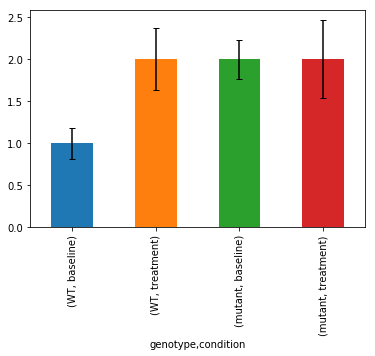

In [4]:
%matplotlib inline

mean.plot.bar(y='value', yerr=std['value'], capsize=3, legend=False)

In some cases, it is better to create dataframes with labelled columns rather than a MultiIndex. For example, categorical plots in [Seaborn](https://seaborn.pydata.org/) work better without the MultiIndex.

This can be accomplished by passing the parameter `as_index=False` to the `groupby` function

  genotype  condition  animal  measurement  value
0       WT   baseline     1.5          1.5    1.0
1       WT  treatment     1.5          1.5    2.0
2   mutant   baseline     3.5          1.5    2.0
3   mutant  treatment     3.5          1.5    2.0


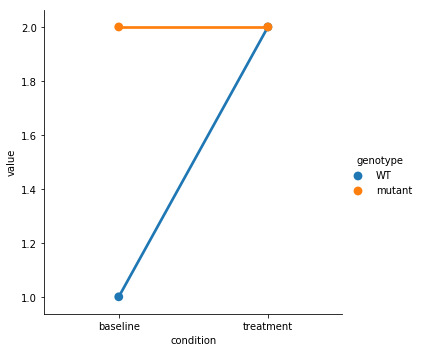

In [5]:
import seaborn as sns

mean2 = df.groupby(['genotype', 'condition'], as_index=False).mean()
print(mean2.head())
sns.catplot(x='condition', y='value', hue='genotype', kind='point', data=mean2)